* Load and Explore the Data: Load the dataset and visualize it to understand its characteristics.
* Stationarity Check: Check if the time series is stationary. If not, apply techniques like differencing to make it stationary.
* Determine ARIMA Order: Use plots like ACF and PACF to determine the (p, d, q) order of ARIMA.
* Fit ARIMA Model: Once the order is determined, fit the ARIMA model.
* Determine SARIMA Order: If seasonality is present, determine the seasonal order (P, D, Q, s) for SARIMA.
* Fit SARIMA Model: Fit the SARIMA model using the determined order.
* Model Evaluation: Compare the performance of ARIMA and SARIMA using metrics like AIC, BIC, or RMSE.
* Forecasting: Use the best performing model to make future forecasts.

* 1. Define the Problem
* We want to forecast the number of international usage mins on a dod basis.
* 
* 2. Data Collection
* The dataset is available in many statistical libraries. For simplicity, I'll use the one in the statsmodels library.
* 
* 3. Data Cleaning and Preprocessing
* We'll check for missing values and ensure the data is in the right format.
* 
* 4. Exploratory Data Analysis (EDA)
* We'll visualize the data to identify any patterns or seasonality.
* 
* 5. Feature Engineering
* For this example, we'll stick to the raw data without external features.
* 
* 6. Model Selection
* We'll start with an ARIMA model.
* 
* 7. Model Training & 8. Model Evaluation
* We'll split the data, train the ARIMA model, and evaluate its performance.
* 
* 9. Model Optimization
* We'll ensure the model parameters are well-tuned.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
data = pd.read_csv(r'C:\Users\uddandam.prakash\Downloads\tsa_model_base_v1.csv')
#datav1=pd.read_excel(r'C:\Users\uddandam.prakash\Downloads\netonetoeconetdatav1.xlsx')
#datav1.head()

,part_date,msc_mtc_total_og_call_cnt,msc_mtc_total_og_call_mins,tariff_rate,termination_rate,rtgs_interbank_exchange
0,20211001,2769121,2.872686e+06,2.8083,0.2,175
1,20211002,2785358,2.889148e+06,2.8083,0.2,175
2,20211003,2379681,2.573574e+06,2.8083,0.2,175
3,20211004,2709186,2.907063e+06,2.8083,0.2,175
4,20211005,2718749,2.932044e+06,2.8083,0.2,175


In [34]:
datav1.head()

,part_date,msc_mtc_total_og_call_cnt,msc_mtc_total_og_call_mins,tariff_rate,termination_rate,rtgs_interbank_exchange
0,20211001,2769121,2.872686e+06,2.8083,0.2,175
1,20211002,2785358,2.889148e+06,2.8083,0.2,175
2,20211003,2379681,2.573574e+06,2.8083,0.2,175
3,20211004,2709186,2.907063e+06,2.8083,0.2,175
4,20211005,2718749,2.932044e+06,2.8083,0.2,175


In [35]:
data['tarriff_usd'] = data.tariff_rate/data.rtgs_interbank_exchange

In [36]:
data['tarriff_usd'].head()

0    0.016047
1    0.016047
2    0.016047
3    0.016047
4    0.016047
Name: tarriff_usd, dtype: float64

In [ ]:
## List of columns to keep
#columns_to_keep = [
#   'age',
#'sms_25_cust',
#'recharges_by_others_in_usd',
#'aon',
#'data_usage',
#'utilization_rate_percentage',
#'sms_5_cust',
#'sms_10_cust',
#'total_revenue',
#'effective_rate_percentage',
#'smb_avg_value',
#'sms_revenue',
#'sms_usage',
#'sms_distinct_days',
#'smb_min_value'
#]
#
## Drop columns not in the list
#X_train = X_train[columns_to_keep]
#X_test = X_test[columns_to_keep]
#
## Now, 'df' contains only the columns you specified in 'columns_to_keep'


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
#data = pd.read_csv(r'C:\Users\uddandam.prakash\Downloads\tsa_model_base_v1.csv')
#datav1=pd.read_excel(r'C:\Users\uddandam.prakash\Downloads\netonetoeconetdatav1.xlsx')
#data.head()

## Cleaning up the data
data.columns=["Date","no_of_calls","usage_mins","tarriff_rate","termination_rate","rtgs_rate","tarriff_usd"]
datav1.columns=["Date","no_of_calls","usage_mins","tarriff_rate","termination_rate","rtgs_rate"]
#data.head()
datav1.head()



,Date,no_of_calls,usage_mins,tarriff_rate,termination_rate,rtgs_rate
0,20211001,2769121,2.872686e+06,2.8083,0.2,175
1,20211002,2785358,2.889148e+06,2.8083,0.2,175
2,20211003,2379681,2.573574e+06,2.8083,0.2,175
3,20211004,2709186,2.907063e+06,2.8083,0.2,175
4,20211005,2718749,2.932044e+06,2.8083,0.2,175


In [ ]:
x = data['usage_mins']
y = data['month']

# Create a scatter plot
plt.scatter(x, y)

# Add labels and a title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot of no of calls vs rtgs rate')

# Show the plot
plt.show()

In [ ]:
datav1.head()


In [43]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data.set_index('Date', inplace=True)

In [44]:
data.head()

,no_of_calls,usage_mins,tarriff_rate,termination_rate,rtgs_rate,tarriff_usd,year,month
Date,,,,,,,,
2021-10-01,1701336,1492856,2.8083,0.2,175,0.016047,2021,10
2021-10-02,1696106,1467425,2.8083,0.2,175,0.016047,2021,10
2021-10-03,1453001,1285924,2.8083,0.2,175,0.016047,2021,10
2021-10-04,1640321,1468526,2.8083,0.2,175,0.016047,2021,10
2021-10-05,1634891,1458419,2.8083,0.2,175,0.016047,2021,10


In [13]:
datav1['Date'] = pd.to_datetime(datav1['Date'], format='%Y%m%d')
datav1['year'] = datav1['Date'].dt.year
datav1['month'] = datav1['Date'].dt.month
datav1.set_index('Date', inplace=True)

In [14]:
datav1.head()

,no_of_calls,usage_mins,tarriff_rate,termination_rate,rtgs_rate,year,month
Date,,,,,,,
2021-10-01,2769121,2.872686e+06,2.8083,0.2,175,2021,10
2021-10-02,2785358,2.889148e+06,2.8083,0.2,175,2021,10
2021-10-03,2379681,2.573574e+06,2.8083,0.2,175,2021,10
2021-10-04,2709186,2.907063e+06,2.8083,0.2,175,2021,10
2021-10-05,2718749,2.932044e+06,2.8083,0.2,175,2021,10


In [ ]:
data.dtypes

In [ ]:
datav1.dtypes

In [ ]:
data.head()

2. Stationarity Check
Stationarity is a critical concept in time series forecasting. A time series is said to be stationary if its statistical properties (mean, variance, autocorrelation, etc.) do not change over time. ARIMA models require the data to be stationary.

The Augmented Dickey-Fuller (ADF) test is a popular method to check for stationarity. The null hypothesis of the ADF test is that the time series is non-stationary. If the test statistic is less than the critical value, we reject the null hypothesis and infer that the series is stationary.

Let's run the ADF test on our series.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Conduct Augmented Dickey-Fuller test
result = adfuller(data['usage_mins'])

# Extract test statistic and critical values
adf_statistic = result[0]
critical_values = result[4]

adf_statistic, critical_values


The Augmented Dickey-Fuller (ADF) test results are as follows:

Test Statistic: 
−
0.8999
−0.8999
Critical Values:
1%: 
−
3.4396
−3.4396
5%: 
−
2.8656
−2.8656
10%: 
−
2.5689
−2.5689
Given that the test statistic 
−
0.8999
−0.8999 is greater than all the critical values, we fail to reject the null hypothesis. This means that the time series is non-stationary.

3. Differencing to Achieve Stationarity
One common method to make a time series stationary is differencing. This involves subtracting the previous observation from the current observation. Let's apply differencing and then check for stationarity again.

After applying first-order differencing, the time series appears to exhibit more stationary behavior, as reflected in the plot.

The Augmented Dickey-Fuller (ADF) test results for the differenced series are:

Test Statistic: 
−
8.2239
−8.2239
Critical Values:
1%: 
−
3.4396
−3.4396
5%: 
−
2.8656
−2.8656
10%: 
−
2.5689
−2.5689
Given that the test statistic 
−
8.2239
−8.2239 is now less than all the critical values, we reject the null hypothesis. This indicates that the differenced series is stationary.

. Determine ARIMA Order
To determine the order of ARIMA (p, d, q), we can use the Autocorrelation Function (ACF) and the Partial Autocorrelation Function (PACF) plots.

�
p is the order of the AutoRegressive (AR) term. It can be determined from the PACF plot.
�
d is the order of differencing. In our case, 
�
=
1
d=1 since we applied first-order differencing.
�
q is the order of the Moving Average (MA) term. It can be determined from the ACF plot.
Let's plot the ACF and PACF for the differenced series to determine 
�
p and 
�
q.

The ACF and PACF plots provide insights into the AR (p) and MA (q) components:

ACF (Autocorrelation Function): This shows the correlation of the series with its own lags. From the plot, we can see that there are significant spikes at the initial lags. This suggests the presence of an MA component.
PACF (Partial Autocorrelation Function): This depicts the correlation of the series with its own lags after removing the effects of previous lags. The significant spike at lag 1 suggests the presence of an AR component.
From the plots:

A good starting point for 
�
p (AR order) might be 1, since there's a significant spike at lag 1 in the PACF.
For 
�
q (MA order), considering the ACF plot, we can start with 1.
Given that we applied first-order differencing, 
�
=
1
d=1.

Thus, a good starting point for our ARIMA model might be 
(
�
,
�
,
�
)
=
(
1
,
1
,
1
)
(p,d,q)=(1,1,1).

5. Fit ARIMA Model
Let's fit the ARIMA model using the orders we derived and evaluate its performance on the training data.

In [38]:
data.columns

Index(['Date', 'no_of_calls', 'usage_mins', 'tarriff_rate', 'termination_rate',
       'rtgs_rate', 'tarriff_usd'],
      dtype='object')

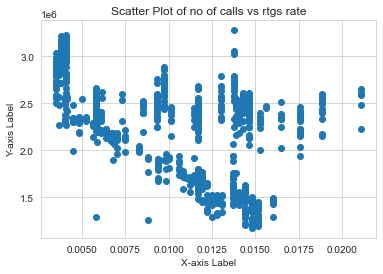

In [39]:
x = data['tarriff_usd']
y = data['usage_mins']

# Create a scatter plot
plt.scatter(x, y)

# Add labels and a title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot of no of calls vs rtgs rate')

# Show the plot
plt.show()

C:\Users\uddandam.prakash\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Model: Neural Network


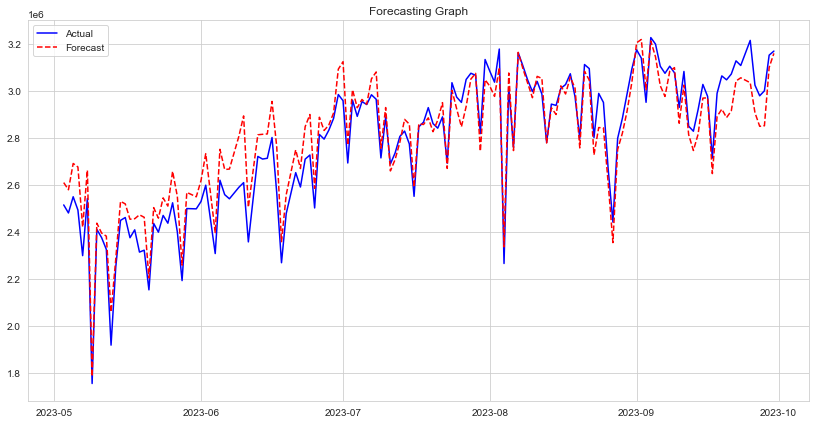

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Handle missing values. You can use imputation methods, but for simplicity, we'll drop them here.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is now in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)  # Increased iterations for convergence
}

for name, model in models.items():
    model.fit(X_train, y_train)

# Model Evaluation
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

# Model Selection
best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

# Final Model Training
best_model.fit(X, y)

# Use the best model for predictions
# Assuming your future data is the same as X_test for demonstration purposes.
predictions = best_model.predict(X_test)

# Store predictions in a variable
forecasted_values = predictions

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual', color='blue')
plt.plot(y_test.index, forecasted_values, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph')
plt.legend()
plt.show()


Best Model: Neural Network


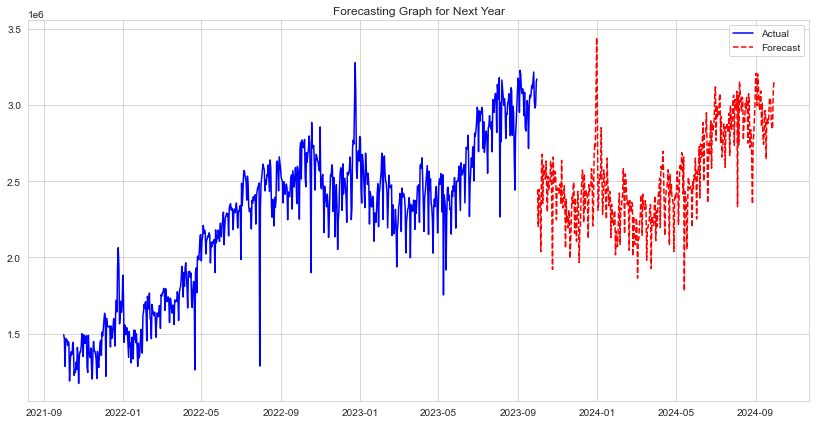

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Handle missing values.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Neural Network": MLPRegressor(max_iter=2000)  # Increased iterations for potential convergence
}

for name, model in models.items():
    model.fit(X_train, y_train)

# Model Evaluation
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

# Model Selection
best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-365:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=365)
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()


Model: Linear Regression
MAE: 1413487.5249
MSE: 2296447665406.4585
RMSE: 1515403.4662
------------------------------
Model: Decision Tree
MAE: 242097.0897
MSE: 81373999614.7172
RMSE: 285261.2831
------------------------------
Model: Random Forest
MAE: 233084.2927
MSE: 72147823074.7745
RMSE: 268603.4681
------------------------------
Model: Gradient Boosting
MAE: 244544.1781
MSE: 79861926400.5222
RMSE: 282598.5251
------------------------------
Model: Neural Network
MAE: 214510.7198
MSE: 60298872830.8743
RMSE: 245558.2881
------------------------------

Best Model based on RMSE: Neural Network



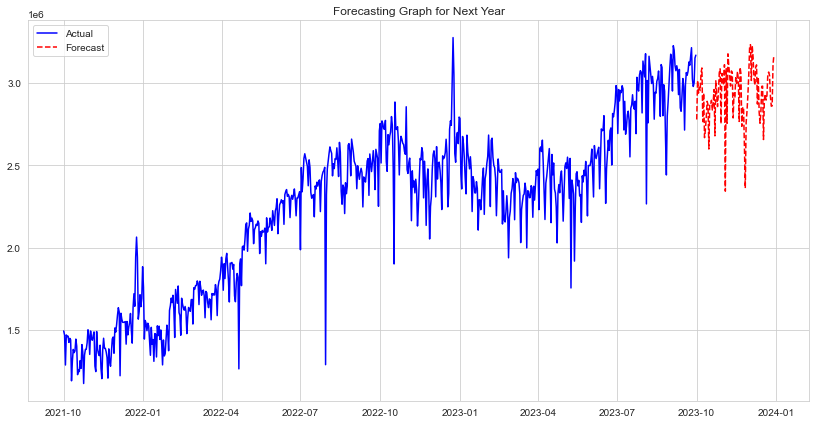

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Handle missing values.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Neural Network": MLPRegressor(max_iter=2000)  # Increased iterations for potential convergence
}

for name, model in models.items():
    model.fit(X_train, y_train)

# Model Evaluation
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

# Display evaluation metrics for each model
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print("-" * 30)

# Model Selection
best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = models[best_model_name]
print(f"\nBest Model based on RMSE: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-90:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=90)
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate some example data
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train an MLP regressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(5, 5), max_iter=1000, random_state=42)
mlp_regressor.fit(X_train, y_train)

# Make predictions
y_pred = mlp_regressor.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


In [ ]:
# Get the coefficients for each layer
for i, coef in enumerate(best_model.coefs_):
    print(f"Layer {i} weights shape: {coef.shape}")
    print(f"Layer {i} weights:")
    print(coef)
    print(f"Layer {i} biases shape: {best_model.intercepts_[i].shape}")
    print(f"Layer {i} biases:")
    print(best_model.intercepts_[i])


Model: Linear Regression
MAE: 1413487.5249
MSE: 2296447665406.4585
RMSE: 1515403.4662
------------------------------
Model: Decision Tree
MAE: 242458.4483
MSE: 81423125355.3724
RMSE: 285347.3766
------------------------------
Model: Random Forest
MAE: 240331.4094
MSE: 77099611889.7742
RMSE: 277668.1687
------------------------------
Model: Gradient Boosting
MAE: 244533.3787
MSE: 79857997173.7573
RMSE: 282591.5731
------------------------------
Model: Neural Network
MAE: 213099.8446
MSE: 59564228321.9822
RMSE: 244057.8381
------------------------------

Best Model based on RMSE: Neural Network



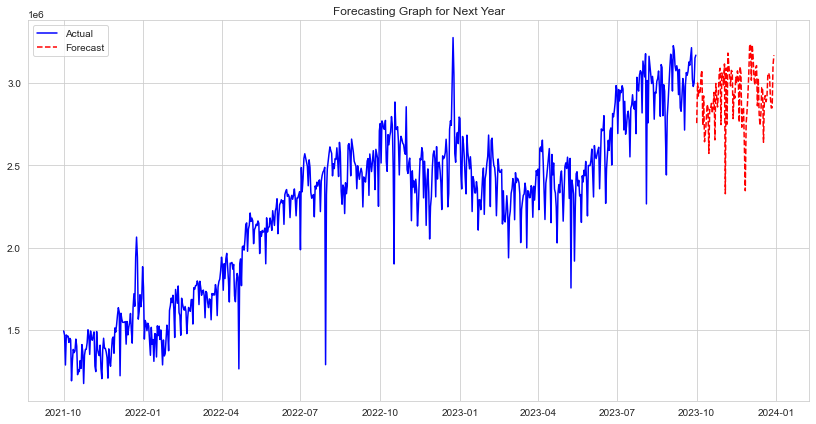

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Handle missing values.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Neural Network": MLPRegressor(max_iter=2000)  # Increased iterations for potential convergence
}

for name, model in models.items():
    model.fit(X_train, y_train)

# Model Evaluation
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

# Display evaluation metrics for each model
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print("-" * 30)

# Model Selection
best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = models[best_model_name]
print(f"\nBest Model based on RMSE: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-90:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Creating a DataFrame for the predictions
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=90)
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Predicted_Usage_Mins': next_year_predictions
})

# Saving the predictions to an Excel file
forecast_df.to_excel("next_year_forecast_v2.xlsx", index=False)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Handle missing values.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Neural Network": MLPRegressor(max_iter=2000)  # Increased iterations for potential convergence
}

for name, model in models.items():
    model.fit(X_train, y_train)

# Model Evaluation
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

# Display evaluation metrics for each model
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print("-" * 30)

# Model Selection
best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = models[best_model_name]
print(f"\nBest Model based on RMSE: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-365:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Creating a DataFrame for the predictions
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=365)
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Predicted_Usage_Mins': next_year_predictions
})

# Resampling the predictions to month-wise and summing the values for each month
monthwise_forecast = forecast_df.resample('M', on='Date').sum()

# Saving the month-wise predictions to an Excel file
#monthwise_forecast.to_excel("monthwise_forecast.xlsx")

# Plotting the forecasting graph
plt.figure(figsize=(18, 7))
plt.plot(y.resample('M').sum().index, y.resample('M').sum().values, label='Actual', color='blue')
plt.plot(monthwise_forecast.index, monthwise_forecast['Predicted_Usage_Mins'].values, label='Forecast', color='red', linestyle='--')
plt.title('Month-wise Forecasting Graph for Next Year')
plt.legend()
plt.show()


In [ ]:
import matplotlib.dates as mdates

# Plotting the forecasting graph with enhanced visuals
plt.figure(figsize=(16, 8))

# Plot actual data
plt.plot(y.resample('M').sum().index, y.resample('M').sum().values, label='Actual', color='blue', linewidth=2)

# Plot forecasted data
forecast_start = monthwise_forecast.index[0]
forecast_end = monthwise_forecast.index[-1]
plt.plot(monthwise_forecast.index, monthwise_forecast['Predicted_Usage_Mins'].values, label='Forecast', color='red', linestyle='--', linewidth=2)

# Shaded region for forecast
plt.axvspan(forecast_start, forecast_end, color='grey', alpha=0.1, label='Forecast Period')

# Enhance x-axis to show month names
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

# Grid, title, and labels
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('Month-wise Forecasting for Next Year', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Usage Minutes', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()

plt.show()


In [ ]:
#######################3second cut#########################################################################3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Handle missing values.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)

# Model Evaluation
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

# Model Selection
best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-365:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=365)
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Handle missing values.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()}

for name, model in models.items():
    model.fit(X_train, y_train)

# Model Evaluation
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

# Display evaluation metrics for each model
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print("-" * 30)

# Model Selection
best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = models[best_model_name]
print(f"\nBest Model based on RMSE: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-90:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=90)
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()


<AxesSubplot:>

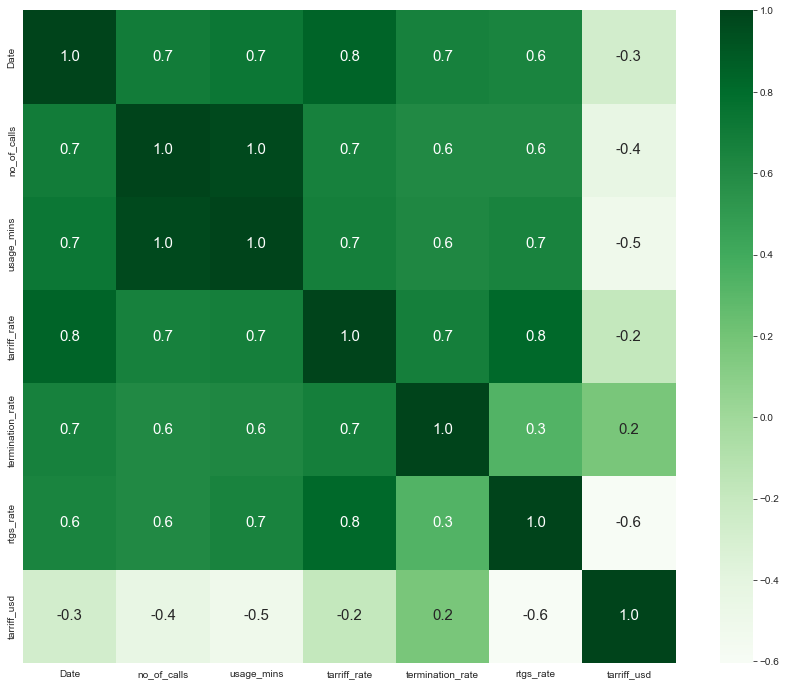

In [40]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape
# Plotting the heatmap of correlation between features
plt.figure(figsize=(16,12))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Handle missing values.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor()}

for name, model in models.items():
    model.fit(X_train, y_train)

# Model Evaluation
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

# Display evaluation metrics for each model
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print("-" * 30)

# Model Selection
best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = models[best_model_name]
print(f"\nBest Model based on RMSE: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-90:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=90)
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()

# Get feature importances for the Random Forest model
random_forest_model = models["Random Forest"]
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top N most important features
top_n = 10  # You can change this number to display more or fewer features
print(f"Top {top_n} Most Important Features:")
print(importance_df.head(top_n))

# You can also visualize the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Handle missing values.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "SVM Regressor": SVR()
}

for name, model in models.items():
    model.fit(X_train, y_train)

# Model Evaluation
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

# Display evaluation metrics for each model
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print("-" * 30)

# Model Selection
best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = models[best_model_name]
print(f"\nBest Model based on RMSE: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-90:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=90)
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()

# Get feature importances for the Random Forest model
random_forest_model = models["Random Forest"]
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top N most important features
top_n = 10  # You can change this number to display more or fewer features
print(f"Top {top_n} Most Important Features:")
print(importance_df.head(top_n))

# You can also visualize the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest')
plt.show()


               Model  R-squared Score
2      Random Forest         0.121659
4            XGBoost         0.064075
3  Gradient Boosting         0.057325
1      Decision Tree         0.039115
5      SVM Regressor        -3.368314
0  Linear Regression       -26.106845

Best Model based on R-squared Score: Random Forest



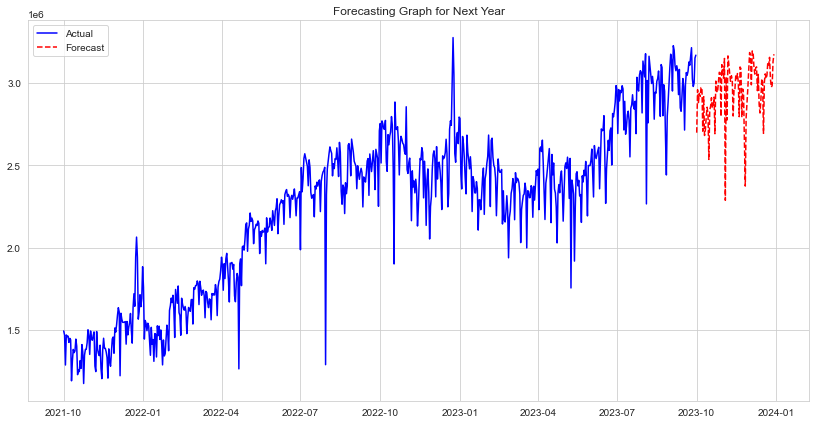

Top 10 Most Important Features:
            Feature  Importance
3         rtgs_rate    0.559931
0       no_of_calls    0.423813
2  termination_rate    0.008690
5             month    0.005662
1      tarriff_rate    0.001467
4              year    0.000436


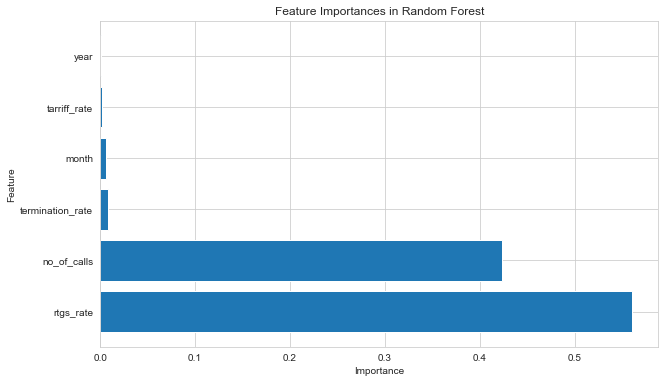

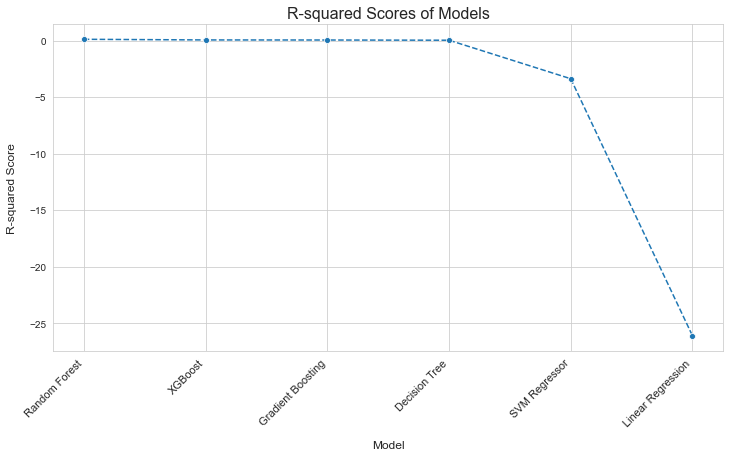

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Handle missing values.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "SVM Regressor": SVR()
}

# Dictionary to store R-squared scores
r_squared_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r_squared_scores[name] = r2

# Create a DataFrame with model names and R-squared scores
models_df = pd.DataFrame({
    'Model': list(r_squared_scores.keys()),
    'R-squared Score': list(r_squared_scores.values())
})

# Sort the DataFrame by R-squared score in descending order
models_df = models_df.sort_values(by='R-squared Score', ascending=False)

# Print the sorted DataFrame
print(models_df)

# Model Selection
best_model_name = models_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nBest Model based on R-squared Score: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-90:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=90)
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()

# Get feature importances for the Random Forest model
if best_model_name == "Random Forest":
    feature_importances = best_model.feature_importances_
    importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display the top N most important features
    top_n = 10  # You can change this number to display more or fewer features
    print(f"Top {top_n} Most Important Features:")
    print(importance_df.head(top_n))

    # You can also visualize the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances in Random Forest')
    plt.show()
    
    # Plot the predictions for each model
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

model_names = list(models_df['Model'])
scores = list(models_df['R-squared Score'])

ax = sns.lineplot(x=model_names, y=scores, marker="o", linestyle='--')
ax.set_xlabel('Model', fontsize=12, labelpad=12)
ax.set_ylabel('R-squared Score', fontsize=12, labelpad=12)
ax.set_title('R-squared Scores of Models', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=11)

plt.show()
    
    


               Model  Adjusted R-squared Score
4            XGBoost                  0.436832
3  Gradient Boosting                  0.377101
2      Random Forest                  0.325003
1      Decision Tree                 -0.050017
5      SVM Regressor                 -3.591522
0  Linear Regression                -19.265780

Best Model based on Adjusted R-squared Score: XGBoost



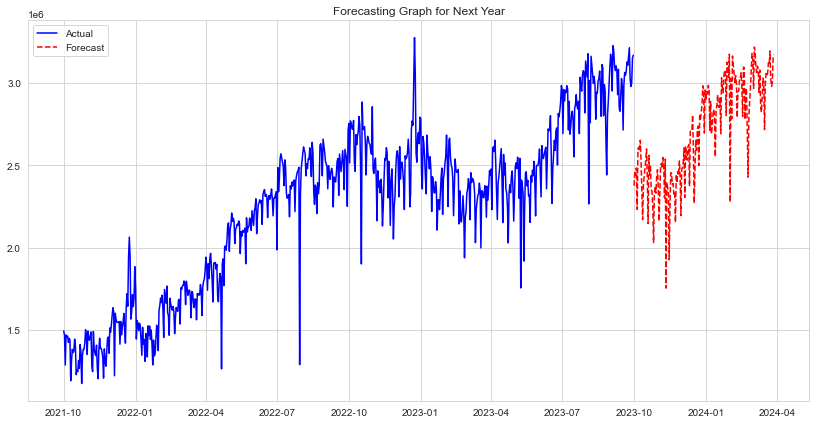

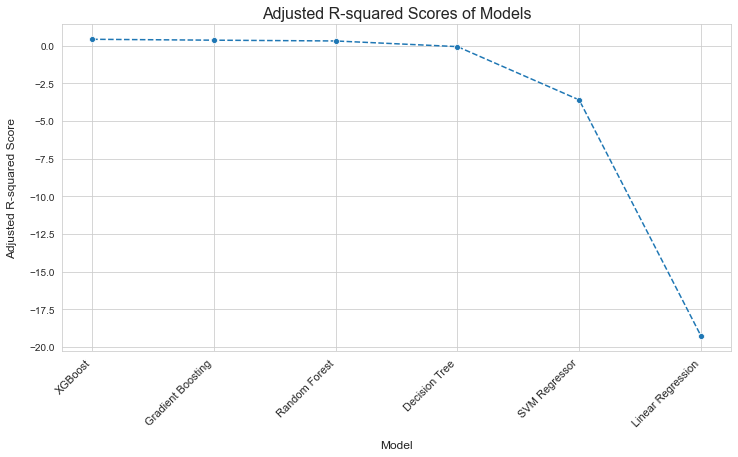

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Handle missing values.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "SVM Regressor": SVR()
}

# Dictionary to store adjusted R-squared scores
adj_r_squared_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate the number of predictors (features)
    num_predictors = X_train.shape[1]
    
    # Calculate the adjusted R-squared value
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - num_predictors - 1)
    adj_r_squared_scores[name] = adj_r2

# Create a DataFrame with model names and adjusted R-squared scores
models_df = pd.DataFrame({
    'Model': list(adj_r_squared_scores.keys()),
    'Adjusted R-squared Score': list(adj_r_squared_scores.values())
})

# Sort the DataFrame by adjusted R-squared score in descending order
models_df = models_df.sort_values(by='Adjusted R-squared Score', ascending=False)

# Print the sorted DataFrame
print(models_df)

# Model Selection
best_model_name = models_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nBest Model based on Adjusted R-squared Score: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-180:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=180)
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()

# Get feature importances for the Random Forest model
if best_model_name == "Random Forest":
    feature_importances = best_model.feature_importances_
    importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display the top N most important features
    top_n = 10  # You can change this number to display more or fewer features
    print(f"Top {top_n} Most Important Features:")
    print(importance_df.head(top_n))

    # You can also visualize the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances in Random Forest')
    plt.show()
    
    # Plot the adjusted R-squared values for each model
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

model_names = list(models_df['Model'])
adj_scores = list(models_df['Adjusted R-squared Score'])

ax = sns.lineplot(x=model_names, y=adj_scores, marker="o", linestyle='--')
ax.set_xlabel('Model', fontsize=12, labelpad=12)
ax.set_ylabel('Adjusted R-squared Score', fontsize=12, labelpad=12)
ax.set_title('Adjusted R-squared Scores of Models', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=11)

plt.show()


# excel econet to netone

In [42]:
data.dtypes

Date                  int64
no_of_calls           int64
usage_mins            int64
tarriff_rate        float64
termination_rate    float64
rtgs_rate             int64
tarriff_usd         float64
dtype: object

               Model  Adjusted R-squared Score
4            XGBoost                  0.436832
3  Gradient Boosting                  0.370920
2      Random Forest                  0.317779
1      Decision Tree                 -0.038386
5      SVM Regressor                 -3.591522
0  Linear Regression                -19.265780

Best Model based on Adjusted R-squared Score: XGBoost



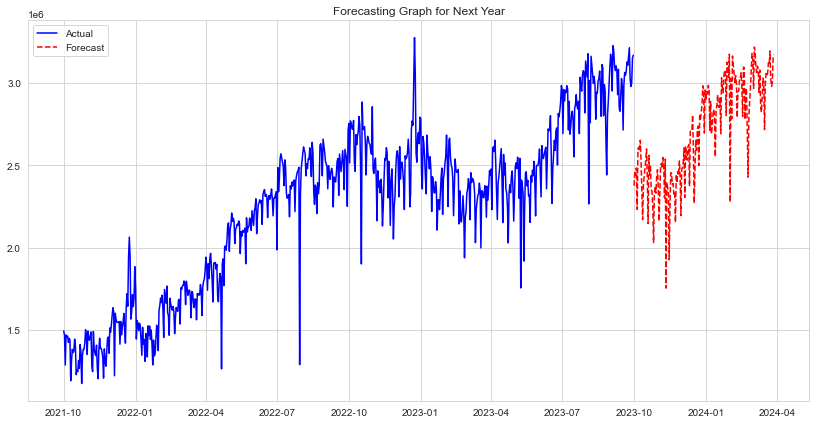

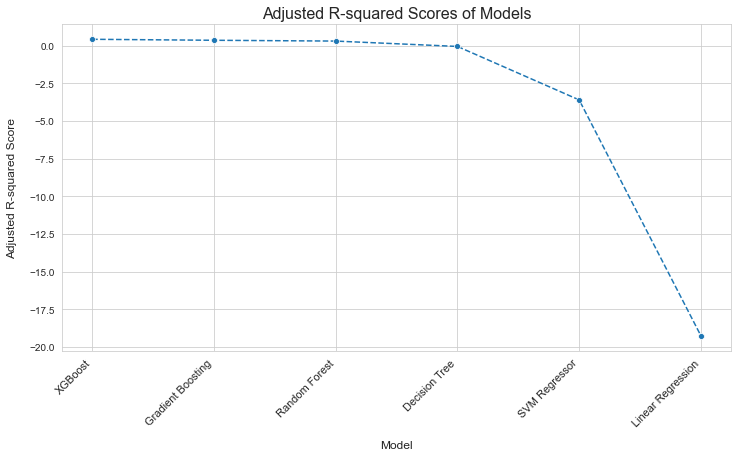

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Handle missing values.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "SVM Regressor": SVR()
}

# Dictionary to store adjusted R-squared scores
adj_r_squared_scores = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate the number of predictors (features)
    num_predictors = X_train.shape[1]
    
    # Calculate the adjusted R-squared value
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - num_predictors - 1)
    adj_r_squared_scores[name] = adj_r2
    
    # Store predictions in the 'predictions' dictionary
    predictions[name] = model.predict(X_test)

# Create a DataFrame with model names and adjusted R-squared scores
models_df = pd.DataFrame({
    'Model': list(adj_r_squared_scores.keys()),
    'Adjusted R-squared Score': list(adj_r_squared_scores.values())
})

# Sort the DataFrame by adjusted R-squared score in descending order
models_df = models_df.sort_values(by='Adjusted R-squared Score', ascending=False)

# Print the sorted DataFrame
print(models_df)

# Model Selection
best_model_name = models_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nBest Model based on Adjusted R-squared Score: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-180:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Create a DataFrame to store the forecasted values
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=180)
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': next_year_predictions})

# Save the forecasted values to an Excel file
forecast_df.to_excel('forecast_results_ecotonet_v111.xlsx', index=False)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()

# Get feature importances for the Random Forest model
if best_model_name == "Random Forest":
    feature_importances = best_model.feature_importances_
    importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display the top N most important features
    top_n = 10  # You can change this number to display more or fewer features
    print(f"Top {top_n} Most Important Features:")
    print(importance_df.head(top_n))

    # You can also visualize the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances in Random Forest')
    plt.show()
    
# Plot the adjusted R-squared values for each model
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

model_names = list(models_df['Model'])
adj_scores = list(models_df['Adjusted R-squared Score'])

ax = sns.lineplot(x=model_names, y=adj_scores, marker="o", linestyle='--')
ax.set_xlabel('Model', fontsize=12, labelpad=12)
ax.set_ylabel('Adjusted R-squared Score', fontsize=12, labelpad=12)
ax.set_title('Adjusted R-squared Scores of Models', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=11)

plt.show()

In [47]:
# Get feature importances for the Random Forest model
if best_model_name == "Random Forest":
    feature_importances = best_model.feature_importances_
    importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display the top N most important features
    top_n = 10  # You can change this number to display more or fewer features
    print(f"Top {top_n} Most Important Features:")
    print(importance_df.head(top_n))

    # You can also visualize the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances in Random Forest')
    plt.show()
    

In [ ]:
datav1.head()

############net one to econet ###############

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Handle missing values.
datav1 = datav1.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(datav1))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = datav1.drop(columns=['usage_mins'])
y = datav1['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "SVM Regressor": SVR()
}

# Dictionary to store adjusted R-squared scores
adj_r_squared_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate the number of predictors (features)
    num_predictors = X_train.shape[1]
    
    # Calculate the adjusted R-squared value
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - num_predictors - 1)
    adj_r_squared_scores[name] = adj_r2

# Create a DataFrame with model names and adjusted R-squared scores
models_df = pd.DataFrame({
    'Model': list(adj_r_squared_scores.keys()),
    'Adjusted R-squared Score': list(adj_r_squared_scores.values())
})

# Sort the DataFrame by adjusted R-squared score in descending order
models_df = models_df.sort_values(by='Adjusted R-squared Score', ascending=False)

# Print the sorted DataFrame
print(models_df)

# Model Selection
best_model_name = models_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nBest Model based on Adjusted R-squared Score: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-180:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=180)
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()

# Get feature importances for the Random Forest model
if best_model_name == "Random Forest":
    feature_importances = best_model.feature_importances_
    importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display the top N most important features
    top_n = 10  # You can change this number to display more or fewer features
    print(f"Top {top_n} Most Important Features:")
    print(importance_df.head(top_n))

    # You can also visualize the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances in Random Forest')
    plt.show()
    
    # Plot the adjusted R-squared values for each model
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

model_names = list(models_df['Model'])
adj_scores = list(models_df['Adjusted R-squared Score'])

ax = sns.lineplot(x=model_names, y=adj_scores, marker="o", linestyle='--')
ax.set_xlabel('Model', fontsize=12, labelpad=12)
ax.set_ylabel('Adjusted R-squared Score', fontsize=12, labelpad=12)
ax.set_title('Adjusted R-squared Scores of Models', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=11)

plt.show()


In [ ]:
data.head(),datav1.head()

# netone to econet excel

               Model  Adjusted R-squared Score
3  Gradient Boosting                  0.689345
2      Random Forest                  0.659731
1      Decision Tree                  0.608350
4            XGBoost                  0.507187
5      SVM Regressor                 -0.504992
0  Linear Regression                -57.185988

Best Model based on Adjusted R-squared Score: Gradient Boosting



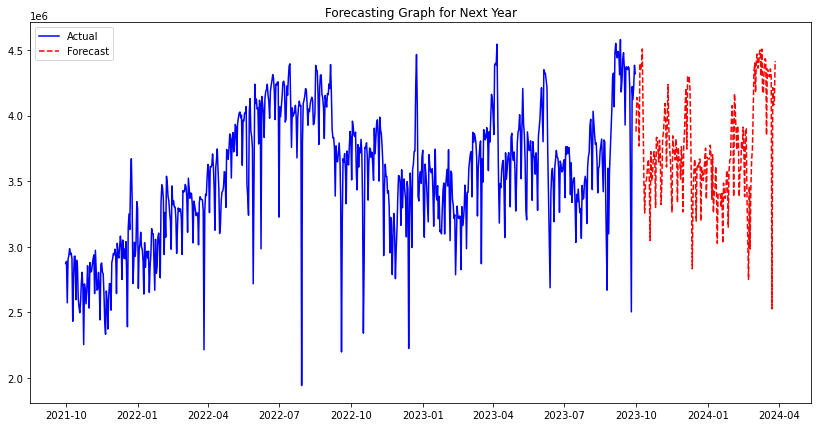

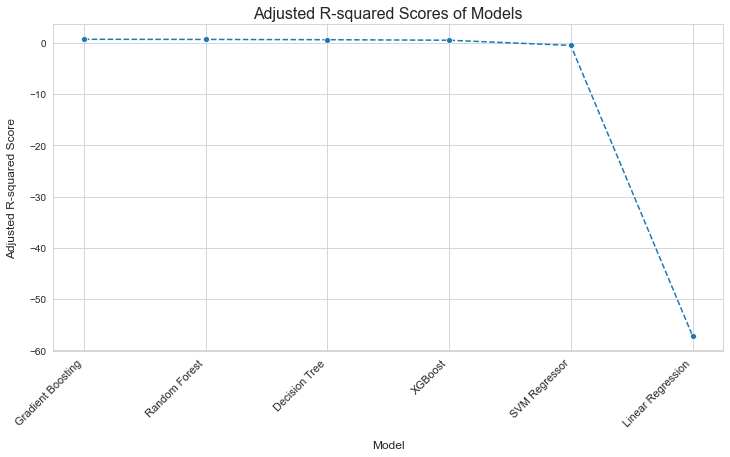

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Handle missing values.
datav1 = datav1.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(datav1))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = datav1.drop(columns=['usage_mins'])
y = datav1['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "SVM Regressor": SVR()
}

# Dictionary to store adjusted R-squared scores
adj_r_squared_scores = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate the number of predictors (features)
    num_predictors = X_train.shape[1]
    
    # Calculate the adjusted R-squared value
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - num_predictors - 1)
    adj_r_squared_scores[name] = adj_r2
    
    # Store predictions in the 'predictions' dictionary
    predictions[name] = model.predict(X_test)

# Create a DataFrame with model names and adjusted R-squared scores
models_df = pd.DataFrame({
    'Model': list(adj_r_squared_scores.keys()),
    'Adjusted R-squared Score': list(adj_r_squared_scores.values())
})

# Sort the DataFrame by adjusted R-squared score in descending order
models_df = models_df.sort_values(by='Adjusted R-squared Score', ascending=False)

# Print the sorted DataFrame
print(models_df)

# Model Selection
best_model_name = models_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nBest Model based on Adjusted R-squared Score: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-180:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Create a DataFrame to store the forecasted values
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=180)
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': next_year_predictions})

# Save the forecasted values to an Excel file
forecast_df.to_excel('forecast_results_netonetoeconet_v2.xlsx', index=False)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()

# Get feature importances for the Random Forest model
if best_model_name == "Random Forest":
    feature_importances = best_model.feature_importances_
    importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display the top N most important features
    top_n = 10  # You can change this number to display more or fewer features
    print(f"Top {top_n} Most Important Features:")
    print(importance_df.head(top_n))

    # You can also visualize the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances in Random Forest')
    plt.show()
    
# Plot the adjusted R-squared values for each model
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

model_names = list(models_df['Model'])
adj_scores = list(models_df['Adjusted R-squared Score'])

ax = sns.lineplot(x=model_names, y=adj_scores, marker="o", linestyle='--')
ax.set_xlabel('Model', fontsize=12, labelpad=12)
ax.set_ylabel('Adjusted R-squared Score', fontsize=12, labelpad=12)
ax.set_title('Adjusted R-squared Scores of Models', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=11)

plt.show()


In [ ]:
scores

# netone to econet data 

In [ ]:
datav1.columns

In [ ]:
X.shape,y.shape

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Handle missing values.
datav1 = datav1.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(datav1))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = datav1.drop(columns=['usage_mins'])
y = datav1['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "SVM Regressor": SVR()
}

# Dictionary to store adjusted R-squared scores
adj_r_squared_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    n = len(X_test)
    p = X_test.shape[1]
    
    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    
    # Calculate adjusted R-squared
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    
    adj_r_squared_scores[name] = adj_r2

# Create a DataFrame with model names and adjusted R-squared scores
models_df = pd.DataFrame({
    'Model': list(adj_r_squared_scores.keys()),
    'Adjusted R-squared Score': list(adj_r_squared_scores.values())
})

# Sort the DataFrame by adjusted R-squared score in descending order
models_df = models_df.sort_values(by='Adjusted R-squared Score', ascending=False)

# Print the sorted DataFrame
print(models_df)

# Model Selection
best_model_name = models_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nBest Model based on Adjusted R-squared Score: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-90:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Generate dates for the next year's predictions
forecast_start_date = datav1.index[-1] + pd.Timedelta(days=1)
forecast_end_date = forecast_start_date + pd.DateOffset(days=179)
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(datav1.index, y.values, label='Actual', color='blue')
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()

# Get feature importances for the Random Forest model
if best_model_name == "Random Forest":
    feature_importances = best_model.feature_importances_
    importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display the top N most important features
    top_n = 10  # You can change this number to display more or fewer features
    print(f"Top {top_n} Most Important Features:")
    print(importance_df.head(top_n))

    # You can also visualize the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances in Random Forest')
    plt.show()


In the list of models and their corresponding R-squared scores, a higher R-squared score indicates a better model fit to the data. Therefore, in our list, "Random Forest" has the highest R-squared score of 0.100980, making it the best-performing model based on the provided R-squared scores.

So, "Random Forest" is the most suitable model from the list you've provided.

In [ ]:
from sklearn.tree import export_text

# Replace 'random_forest_model' with your trained Random Forest model
tree = random_forest_model.estimators_[0]  # Access the first decision tree in the ensemble

# Export the decision tree to text format
tree_text = export_text(tree, feature_names=list(X_train.columns))

# Print the text representation of the decision tree
print(tree_text)


In [ ]:

# Assuming you have already selected the best Random Forest model and it's stored in 'best_model'

# Access the first decision tree in the ensemble
decision_tree = best_model.estimators_[0][0]  # Use [0][0] to access the first decision tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=X_train.columns, class_names=["Usage"], rounded=True)
plt.show()

Certainly! A tree diagram, often referred to as a decision tree, is a visual representation of a machine learning model's decision-making process. Each node (or box) in the tree represents a decision point or a split based on a feature, and the branches represent the possible outcomes or decisions. Here's how to interpret the elements of a decision tree:

    Root Node: The topmost node in the tree is called the root node. It represents the initial decision or the first feature used to split the data. In the diagram, you'll see a rectangular box at the top.

    Internal Nodes: These are nodes within the tree that represent decisions based on specific features. Each internal node has two or more branches, indicating possible paths the data can follow based on the condition of that feature. In the diagram, the internal nodes are also represented as rectangular boxes.

    Leaves (Terminal Nodes): These are the end nodes of the tree where predictions are made. Each leaf node represents a predicted outcome. In a regression tree, the outcome is typically a numerical value. In a classification tree, the outcome is a class label. In the diagram, the leaf nodes are represented as ellipses or circles.

    Edges: The lines connecting nodes represent the flow of data through the decision tree. The direction of the flow is determined by the conditions or rules associated with each internal node.

    Conditions: Each internal node is associated with a condition, which is a rule based on a specific feature. If the condition is true for a data point, it follows one branch; if false, it follows another branch. Conditions can be inequalities, such as "feature value <= threshold."

    Gini Impurity (Classification) or MSE (Regression): Decision trees often display measures of impurity or error at internal nodes. In classification trees, this measure is Gini impurity, while in regression trees, it's Mean Squared Error (MSE). These measures help in determining the quality of the split. Lower impurity or error is preferred when making a decision.

    Number of Samples: At each node, you may see information about the number of samples (data points) that reach that node. It can help you understand how many data points follow each branch.

    Value: For classification trees, you might see the distribution of class labels at a leaf node. For regression trees, you may see the predicted value at a leaf node.

The goal of a decision tree is to make decisions that best separate the data into different classes (for classification) or predict a target value (for regression) accurately. The tree is constructed by recursively splitting the data into subsets based on the features that provide the most information gain or reduction in impurity/error.

The tree diagram is a valuable tool for understanding the logic behind a machine learning model's predictions and for identifying which features are the most important for the model's decision-making process. It provides transparency into how the model is making decisions and is often used for interpretability and model understanding.
Free Research Preview. ChatGPT may produce inaccurate information about people, places, or facts. ChatGPT September 25 Version

Scenario: You are still a bank manager, and you want to decide whether to approve or deny loan applications based on multiple factors. You will use a decision tree to automate this process.

Data: You have a dataset of loan applications with information about the applicant's Credit Score, Income, and Loan Amount. The target variable is still binary: approved (1) or denied (0).

Here's a simplified decision tree:

Certainly, let's expand on the example with multiple features to illustrate how a decision tree considers multiple factors in making a decision. In this case, we'll consider three features: Credit Score, Income, and Loan Amount.

Scenario: You are still a bank manager, and you want to decide whether to approve or deny loan applications based on multiple factors. You will use a decision tree to automate this process.

Data: You have a dataset of loan applications with information about the applicant's Credit Score, Income, and Loan Amount. The target variable is still binary: approved (1) or denied (0).

Here's a simplified decision tree:

scss

                Credit Score <= 700
                /           \
               /             \
          Income <= $50K    Loan Amount <= $10K
         /      \               /       \
        /        \             /         \
  Denied    Approved     Denied    Approved
  (60%)     (40%)        (20%)     (80%)

Let's break down this more complex decision tree:

    Root Node: The first decision is still based on Credit Score. If the applicant's credit score is less than or equal to 700, you follow the left branch; otherwise, you follow the right branch.

    Internal Nodes: In this example, there are three internal nodes, representing decisions based on Credit Score, Income, and Loan Amount.

    Leaves: There are four leaves at the bottom of the tree, each representing a decision based on a combination of features. For example, if the credit score is 700 or lower, income is less than or equal to $50,000, and the loan amount is less than or equal to $10,000, there is an 80% chance the loan will be approved.

    Conditions: The conditions at internal nodes are based on the values of multiple features. For example, the first internal node checks Credit Score <= 700, the second internal node checks Income <= $50,000, and the third internal node checks Loan Amount <= $10,000.

In this more complex decision tree, the model takes into account multiple factors (credit score, income, and loan amount) to make a decision. The conditions at each internal node allow the model to differentiate between different applicant profiles and determine the likelihood of loan approval.

This example demonstrates how decision trees can handle and combine multiple features to make decisions, providing a more nuanced approach to decision-making compared to a single feature. The conditions at each node are learned from the training data to create an effective decision-making process for new, unseen data.

In [ ]:
data.columns

In [ ]:
data.head()

In [ ]:
import hvplot.pandas
datav1.hvplot.hist(by='usage_mins', subplots=False, width=1000)

In [ ]:
data.hvplot.hist("usage_mins")

In [ ]:
data.hvplot.scatter(x='year', y='usage_mins')

In [ ]:
sns.heatmap(data.corr(), annot=True)

In [ ]:
# Create a boxplot using hvplot
boxplot = data.hvplot.box(y='usage_mins', by='year', xlabel='Year', ylabel='Usage Minutes', title='Boxplot of Usage Minutes by Year')

boxplot

In [ ]:
import bokeh
print(bokeh.__version__)


In [ ]:
pip uninstall bokeh


In [ ]:
pip install bokeh==2.3.2


In [ ]:
pip install holoviews==1.14.4

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Handle missing values.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=1200, max_depth=15, min_samples_split=5, min_samples_leaf=5, max_features=None, oob_score=True, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=6000, learning_rate=0.01, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state=42),
    "XGBoost": XGBRegressor(learning_rate=0.01, n_estimators=6000, max_depth=4, min_child_weight=0, gamma=0.6, subsample=0.7, colsample_bytree=0.7, objective='reg:linear', nthread=-1, scale_pos_weight=1, seed=27, reg_alpha=0.00006, random_state=42),
    "SVM Regressor": SVR(C=20, epsilon=0.008, gamma=0.0003)
}

# Dictionary to store R-squared scores
r_squared_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r_squared_scores[name] = r2

# Create a DataFrame with model names and R-squared scores
models_df = pd.DataFrame({
    'Model': list(r_squared_scores.keys()),
    'R-squared Score': list(r_squared_scores.values())
})

# Sort the DataFrame by R-squared score in descending order
models_df = models_df.sort_values(by='R-squared Score', ascending=False)

# Print the sorted DataFrame
print(models_df)

# Model Selection
best_model_name = models_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nBest Model based on R-squared Score: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-90:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=90)
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()
plt.show()

# Get feature importances for the Random Forest model
if best_model_name == "Random Forest":
    feature_importances = best_model.feature_importances_
    importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display the top N most important features
    top_n = 10  # You can change this number to display more or fewer features
    print(f"Top {top_n} Most Important Features:")
    print(importance_df.head(top_n))

    # Visualize the feature importances with a bar graph
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances in Random Forest')
    plt.show()

# Plot the predictions for each model
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

model_names = list(models_df['Model'])
scores = list(models_df['R-squared Score'])

ax = sns.lineplot(x=model_names, y=scores, marker="o", linestyle='--')
ax.set_xlabel('Model', fontsize=12, labelpad=12)
ax.set_ylabel('R-squared Score', fontsize=12, labelpad=12)
ax.set_title('R-squared Scores of Models', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=11)

plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Handle missing values.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "SVM Regressor": SVR()
}

# Dictionary to store R-squared scores
r_squared_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r_squared_scores[name] = r2

# Create a DataFrame with model names and R-squared scores
models_df = pd.DataFrame({
    'Model': list(r_squared_scores.keys()),
    'R-squared Score': list(r_squared_scores.values())
})

# Sort the DataFrame by R-squared score in descending order
models_df = models_df.sort_values(by='R-squared Score', ascending=False)

# Print the sorted DataFrame
print(models_df)

# Model Selection
best_model_name = models_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nBest Model based on R-squared Score: {best_model_name}\n")

# Final Model Training
best_model.fit(X, y)

# Prepare data for next year's forecasting
next_year_data = X.iloc[-90:].copy()

# Predict using the best model for the next year
next_year_predictions = best_model.predict(next_year_data)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y.index, y.values, label='Actual', color='blue')
forecast_dates = pd.date_range(y.index[-1] + pd.Timedelta(days=1), periods=90)
plt.plot(forecast_dates, next_year_predictions, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph for Next Year')
plt.legend()

# Get feature importances for the Random Forest model
if best_model_name == "Random Forest":
    feature_importances = best_model.feature_importances_
    importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display the top N most important features
    top_n = 10  # You can change this number to display more or fewer features
    print(f"Top {top_n} Most Important Features:")
    print(importance_df.head(top_n))

    # You can also visualize the feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances in Random Forest')

# Plot the predictions for each model
plt.subplot(212)
sns.set_style("whitegrid")

model_names = list(models_df['Model'])
scores = list(models_df['R-squared Score'])

ax = sns.lineplot(x=model_names, y=scores, marker="o", linestyle='--')
ax.set_xlabel('Model', fontsize=12, labelpad=12)
ax.set_ylabel('R-squared Score', fontsize=12, labelpad=12)
ax.set_title('R-squared Scores of Models', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=11)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Handle missing values. You can use imputation methods, but for simplicity, we'll drop them here.
data = data.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data))

# Assuming your data is now in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)  # Increased iterations for convergence
}

for name, model in models.items():
    model.fit(X_train, y_train)

# Model Evaluation
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

# Model Selection
best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

# Final Model Training
best_model.fit(X, y)

# Use the best model for predictions
# Assuming your future data is the same as X_test for demonstration purposes.
predictions = best_model.predict(X_test)

# Store predictions in a variable
forecasted_values = predictions

# Create a quarterly DataFrame for actual and forecasted values
quarterly_data = pd.DataFrame({
    'Actual': y_test,
    'Forecasted': forecasted_values
})

# Print the quarterly data
print(quarterly_data)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual', color='blue')
plt.plot(y_test.index, forecasted_values, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
data11 = pd.read_csv(r'C:\Users\uddandam.prakash\Downloads\tsa_model_base_v1.csv')
data12=pd.read_excel(r'C:\Users\uddandam.prakash\Downloads\netonetoeconetdatav1.xlsx')
data11.head()

## Cleaning up the data
data11.columns=["Date","no_of_calls","usage_mins","tarriff_rate","termination_rate","rtgs_rate"]
data12.columns=["Date","no_of_calls","usage_mins","tarriff_rate","termination_rate","rtgs_rate"]
data11.head()
data12.head()



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Handle missing values. You can use imputation methods, but for simplicity, we'll drop them here.
data11 = data11.dropna()

# Ensure no infinite values
assert not np.any(np.isinf(data11))

# Assuming your data is now in a DataFrame called 'data' and the dependent variable is named 'usage_mins'
X = data.drop(columns=['usage_mins'])
y = data['usage_mins']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)  # Increased iterations for convergence
}

for name, model in models.items():
    model.fit(X_train, y_train)

# Model Evaluation
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

# Model Selection
best_model_name = min(results, key=lambda x: results[x]['RMSE'])
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

# Final Model Training
best_model.fit(X, y)

# Use the best model for predictions
# Assuming your future data is the same as X_test for demonstration purposes.
predictions = best_model.predict(X_test)

# Store predictions in a variable
forecasted_values = predictions

# Create a quarterly DataFrame for actual and forecasted values
quarterly_data = pd.DataFrame({
    'Actual': y_test,
    'Forecasted': forecasted_values
})

# Print the quarterly data
print(quarterly_data)

# Save the quarterly data to an Excel file
quarterly_data.to_excel('quarterly_forecast_results.xlsx', index=False)

# Plotting the forecasting graph
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual', color='blue')
plt.plot(y_test.index, forecasted_values, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting Graph')
plt.legend()
plt.show()
